Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf.

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded.

Link to the github repository: <</insert link>>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# %matplotlib inline

In [ ]:
data = pd.read_csv("sample_data/movie_metadata_cleaned.csv")

In [ ]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

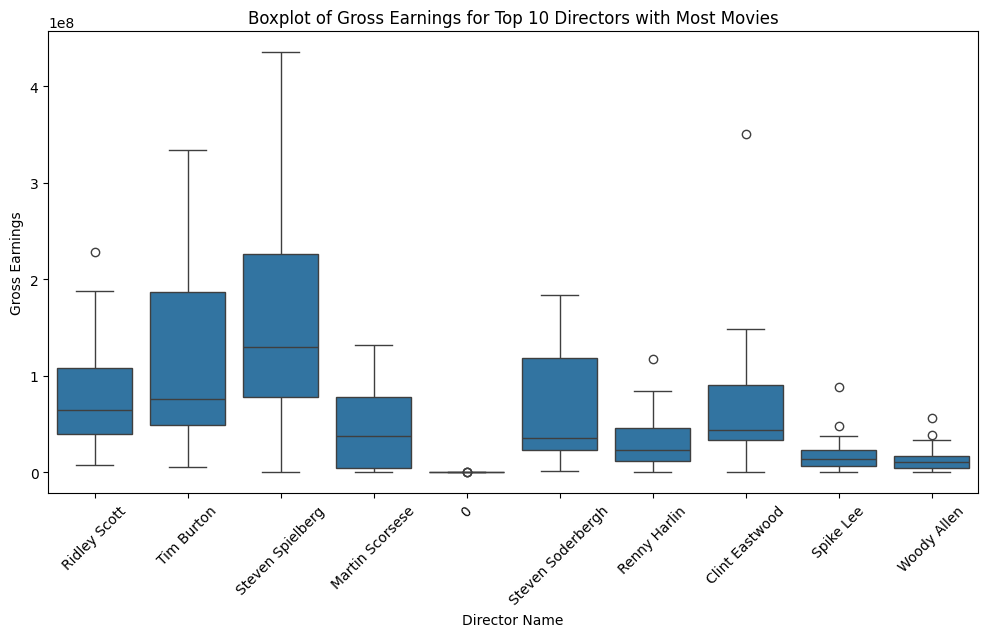

In [ ]:
most_directed = data['director_name'].value_counts().head(10).index
top_directors = data[data['director_name'].isin(most_directed)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='director_name', y='gross', data=top_directors)
plt.xticks(rotation=45)
plt.title('Boxplot of Gross Earnings for Top 10 Directors with Most Movies')
plt.xlabel('Director Name')
plt.ylabel('Gross Earnings')
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

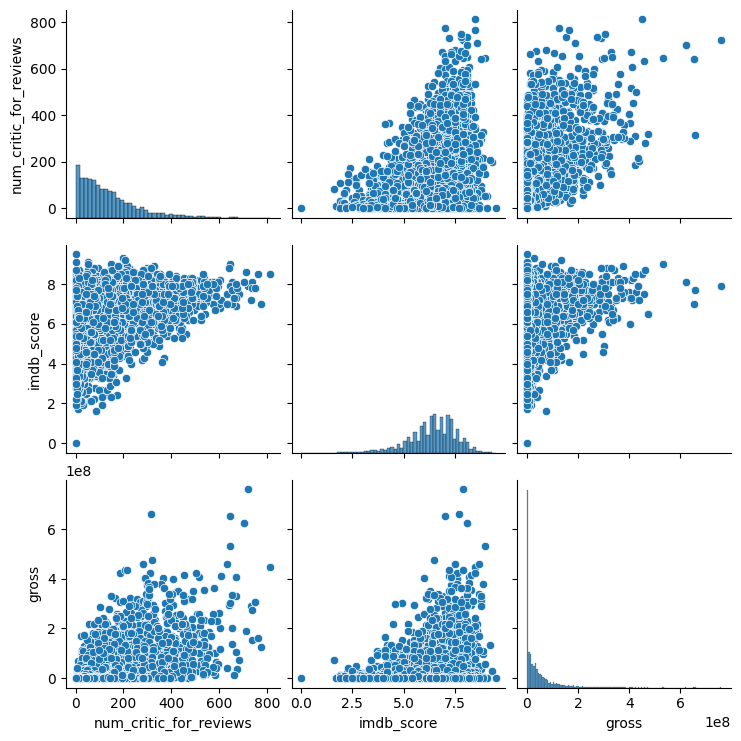

In [ ]:
plot_data = data[['num_critic_for_reviews', 'imdb_score', 'gross']]
sns.pairplot(plot_data, vars=['num_critic_for_reviews', 'imdb_score', 'gross'], kind='scatter')
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [ ]:
data['sales'] = data['gross'] -data['budget']
data.columns

Index(['Unnamed: 0', 'movie_title', 'color', 'director_name',
       'num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'sales'],
      dtype='object')

## Which directors garnered the most total sales?

In [ ]:
most_sales = data.groupby('director_name')['sales'].sum().sort_values(ascending=False)
most_sales.head(10)


,sales
director_name,
Steven Spielberg,2.451332e+09
George Lucas,1.386641e+09
James Cameron,1.199626e+09
Joss Whedon,1.000887e+09
Chris Columbus,9.417076e+08
Peter Jackson,9.009693e+08
Tim Burton,8.242755e+08
Christopher Nolan,8.082276e+08
Jon Favreau,7.693815e+08


## Plot sales and average likes as a scatterplot. Fit it with a line.

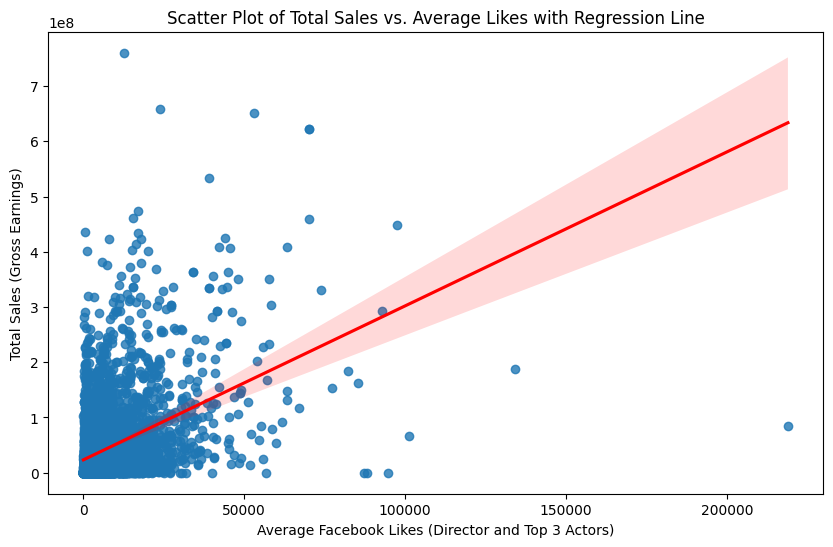

In [ ]:
data['average_likes'] = data[['director_facebook_likes','cast_total_facebook_likes', 'movie_facebook_likes']].mean(axis=1)
plt.figure(figsize=(10, 6))
sns.regplot(x='average_likes', y='gross', data=data, line_kws={'color':'red'})
plt.xlabel('Average Facebook Likes (Director and Top 3 Actors)')
plt.ylabel('Total Sales (Gross Earnings)')
plt.title('Scatter Plot of Total Sales vs. Average Likes with Regression Line')
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

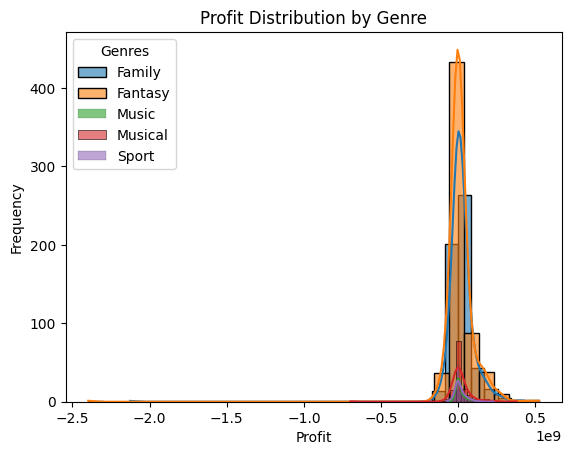

In [ ]:
split_data = data.copy()
split_data['genres'] = split_data['genres'].str.split('|')
split_genres = split_data.explode('genres')
genre_profits = split_genres.groupby('genres')['sales'].mean()
top_genres = genre_profits.sort_values(ascending=False).head(5).index
top_genres_df = split_genres[split_genres['genres'].isin(top_genres)]

for genre in top_genres:
    sns.histplot(top_genres_df[top_genres_df['genres'] == genre]['sales'],
                 label=genre, kde=True, alpha=0.6, bins=30)

plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Profit Distribution by Genre')
plt.legend(title='Genres')
plt.show()




## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

## Copying the whole dataframe

In [ ]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,12611.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,16304.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,32233.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,97586.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,91.333333


## Min-Max Normalization

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [ ]:
numeric_columns = df.select_dtypes(include=['int64','float64']).columns

for column in numeric_columns:
  min_value = df[column].min()
  max_value = df[column].max()
  df[column] = (df[column]-min_value)/(max_value-min_value)

df.head(5)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,USA,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.057585
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,USA,PG-13,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.074447
2,0.000397,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,UK,PG-13,0.020056,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.147181
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,USA,PG-13,0.020466,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.445590
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0,0.000000,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000417
